# 绘制 Sierpinski 三角

`Sierpinski` 三角（名字来源于波兰数学家 `Waclaw Sierpinski`）是一个由内嵌其中的较小的等边三角形组成的等百年三角形的分形。  
下面是对应的变换：每种变换被选择的概率相同，均为1/3。
- 变换1：
    - x<sub>n+1</sub> = 0.5x<sub>n</sub>
    - y<sub>n+1</sub> = 0.5y<sub>n</sub>
- 变换2：
    - x<sub>n+1</sub> = 0.5x<sub>n</sub> + 0.5
    - y<sub>n+1</sub> = 0.5y<sub>n</sub> + 0.5
- 变换3：
    - x<sub>n+1</sub> = 0.5x<sub>n</sub> + 1
    - y<sub>n+1</sub> = 0.5y<sub>n</sub>

In [1]:
import random
import matplotlib.pyplot as plt

In [2]:
def transformation_1(p):
    x, y = p[0], p[1]
    x1, y1 = 0.5*x, 0.5*y
    return x1, y1

def transformation_2(p):
    x, y = p[0], p[1]
    x1, y1 = 0.5*x + 0.5, 0.5*y + 0.5
    return x1, y1

def transformation_3(p):
    x, y = p[0], p[1]
    x1, y1 = 0.5*x + 1, 0.5*y
    return x1, y1

def get_index(probability):
    r = random.random()
    c_probability = 0
    sum_probability = []
    for p in probability:
        c_probability += p
        sum_probability.append(c_probability)
    for item, sp in enumerate(sum_probability):
        if r <= sp:
            return item
    return len(probability)-1

def transform(p):
    # list of transformation functions
    transformations = [transformation_1, transformation_2, transformation_3]
    probability = [1/3, 1/3, 1/3]
    # pick a random transformation function and call it
    tindex = get_index(probability)
    t = transformations[tindex]
    x, y = t(p)
    return x, y

def draw_sierpinski(n):
    # We start with (0, 0)
    x, y = [0], [0]
    x1, y1 = 0, 0
    for i in range(n):
       x1, y1 = transform((x1, y1))
       x.append(x1)
       y.append(y1)
    return x, y

Enter the desired number of points in the Sierpinski Triangle:  1000


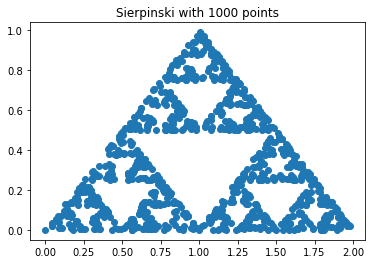

In [3]:
if __name__ == '__main__':
    n = int(input('Enter the desired number of points in the Sierpinski Triangle: '))
    x, y = draw_sierpinski(n)
    # Plot the points
    plt.plot(x, y, 'o')
    plt.title('Sierpinski with {0} points'.format(n))
    plt.show()